<a href="https://colab.research.google.com/github/quant-IT/Clarusway/blob/main/Cardiovascular_Disease_Dataset_Notebook_(Student).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [14]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


⭐Run the following code to read in the "cardio.csv" file.

In [3]:
df = pd.read_csv("/content/cardio.csv", sep=";")

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.shape

(70000, 13)

In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [11]:
df=df[df["ap_hi"]<250]
df=df[df["ap_hi"]>0]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [12]:
iqr=stats.iqr(df.ap_hi)
iqr

20.0

In [15]:
np.percentile(df.ap_hi, 25)-1.5*iqr

90.0

In [20]:
df = df[df["ap_hi"] < 170]
df = df[df["ap_hi"] > 90]

In [21]:
df = df[df["ap_lo"] < 110]
df = df[df["ap_lo"] > 60]

In [22]:
df = df.sample(n = 500)

In [24]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,48365.752000,19794.386000,1.368000,164.294000,74.636000,126.820000,81.506000,1.40000,1.232000,0.066000,0.040000,0.798000,0.536000
std,28868.686705,2467.935524,0.482744,8.429809,15.371111,13.718601,7.413223,0.69927,0.575185,0.248531,0.196155,0.401894,0.499202
min,44.000000,14369.000000,1.000000,111.000000,42.000000,95.000000,70.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,23463.500000,18158.750000,1.000000,159.000000,64.000000,120.000000,80.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,46623.500000,20333.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,71255.750000,21842.750000,2.000000,169.250000,84.000000,140.000000,90.000000,2.00000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99925.000000,23636.000000,2.000000,189.000000,180.000000,160.000000,100.000000,3.00000,3.000000,1.000000,1.000000,1.000000,1.000000


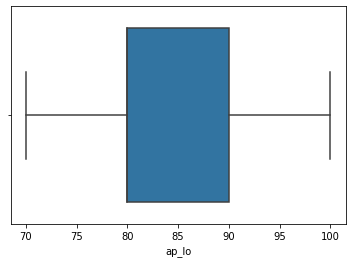

In [23]:
sns.boxplot(x="ap_lo", data=df);

In [16]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69953.000000,69953.000000,69953.000000,69953.000000,69953.000000,69953.000000,69953.000000,69953.000000,69953.000000,69953.000000,69953.000000,69953.000000,69953.000000
mean,49971.745300,19469.085872,1.349578,164.359298,74.209059,126.705845,96.649450,1.366861,1.226509,0.088188,0.053779,0.803682,0.499635
std,28852.902035,2467.049436,0.476840,8.210785,14.396143,18.036626,188.532772,0.680299,0.572310,0.283570,0.225583,0.397214,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,1.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25002.000000,17665.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49996.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74892.000000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [25]:
df.ap_hi.mean()

126.82

⭐What is the standard deviation for Systolic blood pressure?

In [26]:
df.ap_hi.std()

13.718600511714014

⭐What is the standard error of the mean for Systolic blood pressure?

In [27]:
df.ap_hi.sem()

0.6135144660071187

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [28]:
df.ap_hi.describe()

count    500.000000
mean     126.820000
std       13.718601
min       95.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      160.000000
Name: ap_hi, dtype: float64

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [30]:
stats.t.interval(0.99, 499,loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(125.80898154555841, 127.83101845444158)

In [31]:
stats.t.interval(0.95, 499,loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(125.6146100968397, 128.0253899031603)

In [32]:
stats.t.interval(0.90, 499,loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(125.80898154555841, 127.83101845444158)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

In [ ]:
# H0 : mu = 122
# H1 : mu != 122

Conduct the significance test. Use scipy.stats.ttest_1samp

In [33]:
stats.ttest_1samp(df.ap_hi,122)

Ttest_1sampResult(statistic=7.85637546799763, pvalue=2.446331927794623e-14)

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [34]:
df.groupby("gender").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,316.0,126.329114,13.605528,100.0,120.0,120.0,140.0,160.0
2,184.0,127.663043,13.907404,95.0,120.0,120.0,140.0,160.0


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [35]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.137, p=0.712
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [36]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"], equal_var = True)


Ttest_indResult(statistic=-1.048658087118608, pvalue=0.2948441628406974)

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

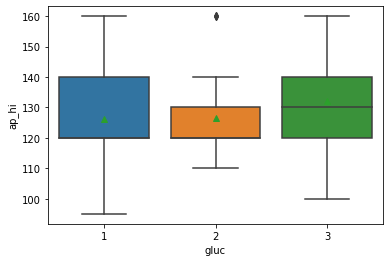

In [37]:
sns.boxplot(x="gluc", y="ap_hi", data=df, showmeans=True);

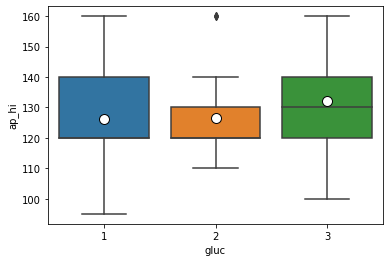

In [42]:
sns.boxplot(x="gluc", y="ap_hi", data=df, showmeans=True,
meanprops={"marker":"o",
           "markerfacecolor":"white",
           "markeredgecolor":"black",
           "markersize":"10"});

⭐Show the descriptive statistics of 3 groups.

In [39]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,422.0,126.369668,13.616074,95.0,120.0,120.0,140.0,160.0
2,40.0,126.500000,13.502137,110.0,120.0,120.0,130.0,160.0
3,38.0,132.157895,14.310318,100.0,120.0,130.0,140.0,160.0


In [ ]:
#H0: ALL means are equal(mu1=mu2=mu3)
#H1: At least mean is different

⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [43]:
stats.f_oneway(df[df["gluc"]==1]["ap_hi"],
               df[df["gluc"]==2]["ap_hi"],
               df[df["gluc"]==3]["ap_hi"])

F_onewayResult(statistic=3.141548568884415, pvalue=0.044075264108993484)

In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [45]:
multicomp=MultiComparison(df["ap_hi"], df["gluc"])

In [46]:
tukey=multicomp.tukeyhsd(alpha=0.05)

In [47]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.1303    0.9 -5.1823   5.443  False
     1      3   5.7882 0.0338  0.3494 11.2271   True
     2      3   5.6579 0.1616 -1.6166 12.9324  False
----------------------------------------------------


## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

In [ ]:
#H0: The two categorical variable are independent
#H1: The two categorical variable are dependent

⭐Create a crosstab using Pandas.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 54709 to 48501
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          500 non-null    int64  
 2   gender       500 non-null    int64  
 3   height       500 non-null    int64  
 4   weight       500 non-null    float64
 5   ap_hi        500 non-null    int64  
 6   ap_lo        500 non-null    int64  
 7   cholesterol  500 non-null    int64  
 8   gluc         500 non-null    int64  
 9   smoke        500 non-null    int64  
 10  alco         500 non-null    int64  
 11  active       500 non-null    int64  
 12  cardio       500 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 70.9 KB


In [52]:
ct=pd.crosstab(df.active, df.cardio)
ct

cardio,0,1
active,,
0,41,60
1,191,208


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [54]:
chi, p, dof, expected= stats.chi2_contingency(ct)

In [55]:
print("test statistic", chi)
print("p-value", p)

test statistic 1.4353919390793644
p-value 0.23088648288315938


In [56]:
print("test statistic", chi)
print("p-value", p)
print("dof", dof)
print("expected", expected)

test statistic 1.4353919390793644
p-value 0.23088648288315938
dof 1
expected [[ 46.864  54.136]
 [185.136 213.864]]


In [57]:
ct1=pd.crosstab(df.cholesterol, df.cardio)
ct1

cardio,0,1
cholesterol,,
1,192,170
2,26,50
3,14,48


In [58]:
chi1, p1, dof1, expected1= stats.chi2_contingency(ct1)

In [61]:
print("test statistic:", chi1)
print("p-value:", p1)
print("degrees of freedom:", dof1) #degrees of freedom: serbestlik derecesi
print("expected:", expected1)

test statistic: 25.09923969189205
p-value: 3.5462500172962202e-06
degrees of freedom: 2
expected: [[167.968 194.032]
 [ 35.264  40.736]
 [ 28.768  33.232]]


In [ ]:
#There is ststistically significant relationship between cholesterol and cardio